In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import scipy.stats as st
import numpy as np
from config import api_key


from pandas.io.json import json_normalize
#%matplotlib notebook

#AA E098DA86-033D-4B74-A6D6-15047B0006DD
#PP EB4A6E29-953E-4DF0-8655-8520B2C51F4A
api_key

'E098DA86-033D-4B74-A6D6-15047B0006DD'

In [2]:
inflation_df = pd.read_csv("Inflationdata.csv")
#print(inflation_df)

In [3]:
#Inflation Data cleaning process
#print(inflation_df)

inflation_data_df= inflation_df[["Year","Inflation Rate"]]

#Set the index to be "TimePeriod" so they will be used as labels
#inflation_data_df = inflation_data_df.set_index("TimePeriod")
#inflation_data_df = inflation_data_df.reset_index()

#inflation_data_df["DataValue"]=inflation_data_df["DataValue"].str.replace(",","")
inflation_data_df["Inflation Rate"]=pd.to_numeric(inflation_data_df["Inflation Rate"])
inflation_data_df["Year"]=pd.to_numeric(inflation_data_df["Year"])
#time_and_data_df.columns = columns
#inflation_data_df

In [4]:
# Save config information.
url = "https://apps.bea.gov/api/data/?&UserID="+api_key+"&method=GETDATASETLIST&"

#url = "http://www.bea.gov/api/data/?&amp;UserID="+api_key+"&amp;method=GetData&amp;DataSetName=IIP&amp;TypeOfInvestment=FinLiabsFoa&amp;Component=Pos&amp;Frequency=QNSA&amp;Year=2013&amp;ResultFormat=xml
    
print(requests.get(url))

print(requests.get(url).json())


<Response [200]>
{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID', 'ParameterValue': 'E098DA86-033D-4B74-A6D6-15047B0006DD'}, {'ParameterName': 'METHOD', 'ParameterValue': 'GETDATASETLIST'}]}, 'Results': {'Dataset': [{'DatasetName': 'NIPA', 'DatasetDescription': 'Standard NIPA tables'}, {'DatasetName': 'NIUnderlyingDetail', 'DatasetDescription': 'Standard NI underlying detail tables'}, {'DatasetName': 'MNE', 'DatasetDescription': 'Multinational Enterprises'}, {'DatasetName': 'FixedAssets', 'DatasetDescription': 'Standard Fixed Assets tables'}, {'DatasetName': 'ITA', 'DatasetDescription': 'International Transactions Accounts'}, {'DatasetName': 'IIP', 'DatasetDescription': 'International Investment Position'}, {'DatasetName': 'GDPbyIndustry', 'DatasetDescription': 'GDP by Industry'}, {'DatasetName': 'InputOutput', 'DatasetDescription': 'Input-Output Data'}, {'DatasetName': 'UnderlyingGDPbyIndustry', 'DatasetDescription': 'Underlying GDP by Industry'}, {'DatasetName': '

In [5]:
#response["BEAAPI"]["Results"]["Dataset"]

response = requests.get(url).json()


print(json.dumps(response, indent=4, sort_keys=True))

{
    "BEAAPI": {
        "Request": {
            "RequestParam": [
                {
                    "ParameterName": "METHOD",
                    "ParameterValue": "GETDATASETLIST"
                },
                {
                    "ParameterName": "USERID",
                    "ParameterValue": "E098DA86-033D-4B74-A6D6-15047B0006DD"
                }
            ]
        },
        "Results": {
            "Dataset": [
                {
                    "DatasetDescription": "Standard NIPA tables",
                    "DatasetName": "NIPA"
                },
                {
                    "DatasetDescription": "Standard NI underlying detail tables",
                    "DatasetName": "NIUnderlyingDetail"
                },
                {
                    "DatasetDescription": "Multinational Enterprises",
                    "DatasetName": "MNE"
                },
                {
                    "DatasetDescription": "Standard Fixed Assets tables",


In [6]:
response["BEAAPI"]["Results"]["Dataset"]
df = pd.DataFrame(response["BEAAPI"]["Results"]["Dataset"])
df.head(200)



,DatasetName,DatasetDescription
0,NIPA,Standard NIPA tables
1,NIUnderlyingDetail,Standard NI underlying detail tables
2,MNE,Multinational Enterprises
3,FixedAssets,Standard Fixed Assets tables
4,ITA,International Transactions Accounts
5,IIP,International Investment Position
6,GDPbyIndustry,GDP by Industry
7,InputOutput,Input-Output Data
8,UnderlyingGDPbyIndustry,Underlying GDP by Industry
9,IntlServTrade,International Services Trade


In [8]:
#nationwide consumption expenditures
url_usa=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAEXP1&GeoFIPS=00000&LineCode=3&Year=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_usa = requests.get(url_usa).json()
response_usa

#Total personal consumption expenditures
usa_df = pd.DataFrame(response_usa["BEAAPI"]["Results"]["Data"])
#df.count
#usa_df 
    
    

In [9]:
#National income 1995 onward BEA Data Pull
url_nat_inc=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=CAINC1&GeoFIPS=00000&LineCode=3&Year=1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_nat_inc = requests.get(url_nat_inc).json()
response_nat_inc

nat_inc_df = pd.DataFrame(response_nat_inc["BEAAPI"]["Results"]["Data"])
nat_inc_df.count
nat_inc_df



,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,CAINC1-3,00000,United States,1995,Dollars,0,"23,607"
1,CAINC1-3,00000,United States,1996,Dollars,0,"24,771"
2,CAINC1-3,00000,United States,1997,Dollars,0,"25,993"
3,CAINC1-3,00000,United States,1998,Dollars,0,"27,557"
4,CAINC1-3,00000,United States,1999,Dollars,0,"28,675"
5,CAINC1-3,00000,United States,2000,Dollars,0,"30,657"
6,CAINC1-3,00000,United States,2001,Dollars,0,"31,589"
7,CAINC1-3,00000,United States,2002,Dollars,0,"31,832"
8,CAINC1-3,00000,United States,2003,Dollars,0,"32,681"
9,CAINC1-3,00000,United States,2004,Dollars,0,"34,251"


In [10]:
#National Consumer spending cleaning process

#usa_data_df= usa_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
#usa_data_df = usa_data_df.set_index("TimePeriod")
#usa_data_df = usa_data_df.reset_index()

#usa_data_df["DataValue"]=usa_data_df["DataValue"].str.replace(",","")
#usa_data_df["DataValue"]=pd.to_numeric(usa_data_df["DataValue"])no -
#usa_data_df.columns = columns


#columns = ["Year","Consumption Expenditures"]


#usa_data_df


In [11]:
#National income cleaning process

#columns = ["Year","Consumption Expenditures"]
nat_inc_data_df= nat_inc_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
nat_inc_data_df = nat_inc_data_df.set_index("TimePeriod")
nat_inc_data_df = nat_inc_data_df.reset_index()

nat_inc_data_df["DataValue"]=nat_inc_data_df["DataValue"].str.replace(",","")
nat_inc_data_df["DataValue"]=pd.to_numeric(nat_inc_data_df["DataValue"])
nat_inc_data_df["TimePeriod"]=pd.to_numeric(nat_inc_data_df["TimePeriod"])
#time_and_data_df.columns = columns
nat_inc_data_df




,TimePeriod,DataValue
0,1995,23607
1,1996,24771
2,1997,25993
3,1998,27557
4,1999,28675
5,2000,30657
6,2001,31589
7,2002,31832
8,2003,32681
9,2004,34251


y = 1258.75x + -2487745.57


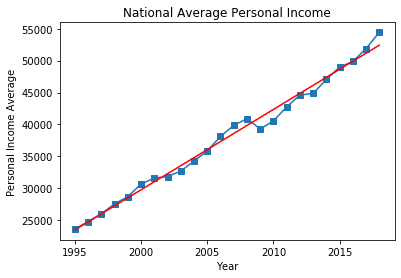

In [12]:
#National Avergage Personal Income Plot
plt.plot(nat_inc_data_df["TimePeriod"], nat_inc_data_df["DataValue"],marker = "s")
#plt.xticks(rotation= 90)
plt.title("National Average Personal Income")
plt.xlabel("Year")
plt.ylabel("Personal Income Average")

#Regression Line
x_values = nat_inc_data_df["TimePeriod"]
y_values = nat_inc_data_df["DataValue"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)


plt.show()

In [13]:
#illinois personal consumption data

url_illinois=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAEXP1&GeoFIPS=17000&LineCode=3&Year=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_illinois = requests.get(url_illinois).json()
response_illinois

#Total personal consumption expenditure
illinois_df = pd.DataFrame(response_illinois["BEAAPI"]["Results"]["Data"])
#df.count
illinois_df 


,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAEXP1-3,17000,Illinois,2000,Millions of current dollars,6,"41,660.5"
1,SAEXP1-3,17000,Illinois,2001,Millions of current dollars,6,"42,293.2"
2,SAEXP1-3,17000,Illinois,2002,Millions of current dollars,6,"43,807.9"
3,SAEXP1-3,17000,Illinois,2003,Millions of current dollars,6,"43,792.5"
4,SAEXP1-3,17000,Illinois,2004,Millions of current dollars,6,"45,740.0"
5,SAEXP1-3,17000,Illinois,2005,Millions of current dollars,6,"46,995.3"
6,SAEXP1-3,17000,Illinois,2006,Millions of current dollars,6,"47,271.5"
7,SAEXP1-3,17000,Illinois,2007,Millions of current dollars,6,"49,983.0"
8,SAEXP1-3,17000,Illinois,2008,Millions of current dollars,6,"45,820.9"
9,SAEXP1-3,17000,Illinois,2009,Millions of current dollars,6,"42,369.8"


In [14]:
#nationwide consumption data
url_nation=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAEXP1&GeoFIPS=00000&LineCode=3&Year=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_nation = requests.get(url_nation).json()
response_nation

#Total personal consumption expenditure
nation_df = pd.DataFrame(response_nation["BEAAPI"]["Results"]["Data"])
#df.count
#nation_df



In [15]:
#illinois Consumer spending cleaning process

#columns = ["Year","Consumption Expenditures"]
illinois_data_df= illinois_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
illinois_data_df = illinois_data_df.set_index("TimePeriod")
#Illinois_df = illinois_dff.reset_index()

illinois_data_df["DataValue"]=illinois_data_df["DataValue"].str.replace(",","")
illinois_data_df["DataValue"]=pd.to_numeric(illinois_data_df["DataValue"])
#time_and_data_df.columns = columns
#illinois_data_df


In [16]:
#nation Consumer spending cleaning process

#columns = ["Year","Consumption Expenditures"]
nation_data_df= nation_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
nation_data_df = nation_data_df.set_index("TimePeriod")
#Illinois_df = illinois_dff.reset_index()

nation_data_df["DataValue"]=nation_data_df["DataValue"].str.replace(",","")
nation_data_df["DataValue"]=pd.to_numeric(nation_data_df["DataValue"])
#time_and_data_df.columns = columns
#nation_data_df

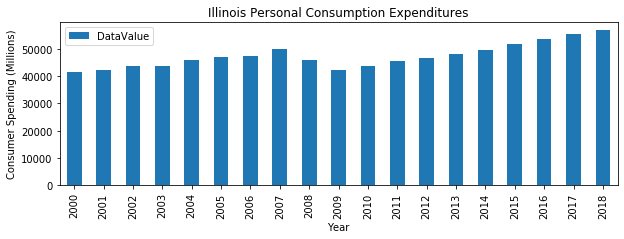

<Figure size 432x288 with 0 Axes>

In [17]:
#Illinois Consumer spending chart

illinois_data_df.plot(kind="bar", figsize=(10,3))
plt.title("Illinois Personal Consumption Expenditures")
plt.xlabel("Year")
plt.ylabel("Consumer Spending (Millions)")
# "Set a title for the chart
# plt.title("Consumer Spending")

plt.show()
plt.savefig("../project1/Illinois Personal Consumtion Expenditures.png")


# similar impact is seen in personal consumption during the same period.

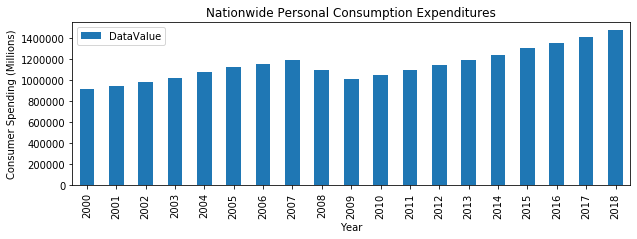

<Figure size 432x288 with 0 Axes>

In [18]:
#Nationwide Consumer spending chart

nation_data_df.plot(kind="bar", figsize=(10,3))
plt.title("Nationwide Personal Consumption Expenditures")
plt.xlabel("Year")
plt.ylabel("Consumer Spending (Millions)")
# "Set a title for the chart
# plt.title("Consumer Spending")

plt.show()
plt.savefig("../project1/Nationwide Personal Consumtion Expenditures.png")

# Looking at personal consumption expendutres data from 2000-2018, significant decrease in personal consumption can be observed nationwide starting 2008.  

In [19]:
#It was determined that the Subsidies data did not prove to be informative enough for our goals

url_subsidies=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAGDP5N&GeoFIPS=00017&LineCode=3&Year=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_subsidies = requests.get(url_subsidies).json()
response_subsidies
# DataTable: SAGDP5N (Subsidies)
#subsidies_df = pd.DataFrame(response_subsidies["BEAAPI"]["Results"]["Data"])
df.count
#subsidies_df

<bound method DataFrame.count of                 DatasetName                    DatasetDescription
0                      NIPA                  Standard NIPA tables
1        NIUnderlyingDetail  Standard NI underlying detail tables
2                       MNE             Multinational Enterprises
3               FixedAssets          Standard Fixed Assets tables
4                       ITA   International Transactions Accounts
5                       IIP     International Investment Position
6             GDPbyIndustry                       GDP by Industry
7               InputOutput                     Input-Output Data
8   UnderlyingGDPbyIndustry            Underlying GDP by Industry
9             IntlServTrade          International Services Trade
10                 Regional                    Regional data sets
11       APIDatasetMetaData     Metadata about other API datasets>

In [20]:
#Illinois income 1995 onward BEA Data Pull
url_il_inc=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=CAINC1&GeoFIPS=17000&LineCode=3&Year=1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_il_inc = requests.get(url_il_inc).json()
response_il_inc

il_inc_df = pd.DataFrame(response_il_inc["BEAAPI"]["Results"]["Data"])
il_inc_df.count
#il_inc_df


<bound method DataFrame.count of         Code GeoFips   GeoName TimePeriod  CL_UNIT UNIT_MULT DataValue
0   CAINC1-3   17000  Illinois       1995  Dollars         0    25,633
1   CAINC1-3   17000  Illinois       1996  Dollars         0    27,066
2   CAINC1-3   17000  Illinois       1997  Dollars         0    28,422
3   CAINC1-3   17000  Illinois       1998  Dollars         0    29,934
4   CAINC1-3   17000  Illinois       1999  Dollars         0    31,024
5   CAINC1-3   17000  Illinois       2000  Dollars         0    33,169
6   CAINC1-3   17000  Illinois       2001  Dollars         0    34,230
7   CAINC1-3   17000  Illinois       2002  Dollars         0    34,522
8   CAINC1-3   17000  Illinois       2003  Dollars         0    35,039
9   CAINC1-3   17000  Illinois       2004  Dollars         0    36,334
10  CAINC1-3   17000  Illinois       2005  Dollars         0    37,793
11  CAINC1-3   17000  Illinois       2006  Dollars         0    40,214
12  CAINC1-3   17000  Illinois       2007  D

In [21]:
#illinois income cleaning process

#columns = ["Year","Consumption Expenditures"]
il_inc_data_df= il_inc_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
il_inc_data_df = il_inc_data_df.set_index("TimePeriod")
il_inc_data_df = il_inc_data_df.reset_index()

il_inc_data_df["DataValue"]=il_inc_data_df["DataValue"].str.replace(",","")
il_inc_data_df["DataValue"]=pd.to_numeric(il_inc_data_df["DataValue"])
il_inc_data_df["TimePeriod"]=pd.to_numeric(il_inc_data_df["TimePeriod"])
#time_and_data_df.columns = columns
il_inc_data_df

,TimePeriod,DataValue
0,1995,25633
1,1996,27066
2,1997,28422
3,1998,29934
4,1999,31024
5,2000,33169
6,2001,34230
7,2002,34522
8,2003,35039
9,2004,36334


y = 1246.89x + -2461748.63


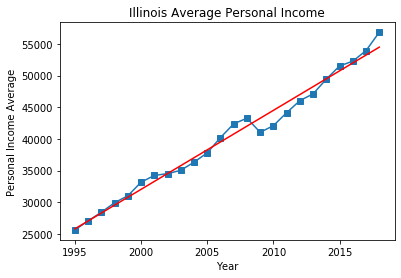

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(il_inc_data_df["TimePeriod"], il_inc_data_df["DataValue"],marker = "s")
#plt.xticks(rotation= 90)
plt.title("Illinois Average Personal Income")
plt.xlabel("Year")
plt.ylabel("Personal Income Average")

#Regression Line
x_values = il_inc_data_df["TimePeriod"]
y_values = il_inc_data_df["DataValue"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)


plt.show()
plt.savefig("../project1/Illinois Average Personal Income .png")


# Average personal income in Illinois decreased during the great recession and took around six years to get back to trend line.

y = -0.05x + 99.71


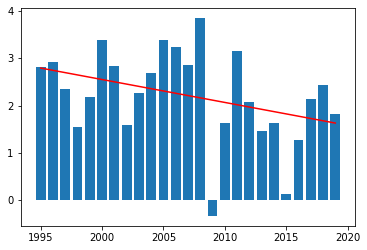

<Figure size 432x288 with 0 Axes>

In [23]:
plt.bar(inflation_df["Year"],inflation_df["Inflation Rate"])
# plt.title("Inflation Data Trends")
# plt.xlabel("Year")
# plt.ylabel("Inflation Rate")
#Regression Line for inflation
x_values = inflation_df["Year"]
y_values = inflation_df["Inflation Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)


plt.show()

plt.savefig("../project1/Average Annual Inflation.png")



# Inflation rate dropped dramatically around 2009. 

In [24]:
#national income
url_us_inc=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAINC1&GeoFIPS=00000&LineCode=3&Year=1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019&ResultFormat=JSON"
response_us_inc = requests.get(url_us_inc).json()
#response_pcomp

us_inc_df = pd.DataFrame(response_us_inc["BEAAPI"]["Results"]["Data"])
#us_inc_df.count
#us_inc_df


In [25]:
#National personal Income Data cleaning process

#columns = ["Year","Consumption Expenditures"]
us_inc_data_df= us_inc_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
us_inc_data_df = us_inc_data_df.set_index("TimePeriod")
us_inc_data_df = us_inc_data_df.reset_index()

us_inc_data_df["DataValue"]=us_inc_data_df["DataValue"].str.replace(",","")
us_inc_data_df["DataValue"]=pd.to_numeric(us_inc_data_df["DataValue"])
us_inc_data_df["TimePeriod"]=pd.to_numeric(us_inc_data_df["TimePeriod"])
#time_and_data_df.columns = columns
#us_inc_data_df

y = 1298.7x + -2567841.94


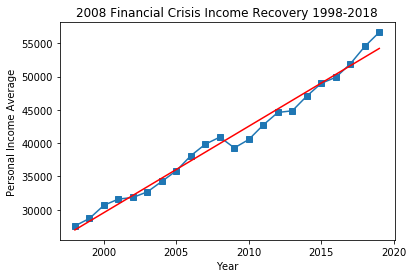

<Figure size 432x288 with 0 Axes>

In [26]:
#National personal Income Data plot
plt.plot(us_inc_data_df["TimePeriod"], us_inc_data_df["DataValue"],marker = "s")
#plt.xticks(rotation= 90)
plt.title("2008 Financial Crisis Income Recovery 1998-2018")
plt.xlabel("Year")
plt.ylabel("Personal Income Average")

#Regression Line
x_values = us_inc_data_df["TimePeriod"]
y_values = us_inc_data_df["DataValue"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)


plt.show()
plt.savefig("../project1/Financial Crisis Income Recovery.png")

# Personal income impacted negatively around 2009, and took around six years to recover.

In [27]:
#Great Depression data pull
url_great_inc=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAINC1&GeoFIPS=00000&LineCode=3&Year=1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949&ResultFormat=JSON"
response_great_inc = requests.get(url_great_inc).json()
#response_pcomp

us_great_df = pd.DataFrame(response_great_inc["BEAAPI"]["Results"]["Data"])
#us_great_df.count
#us_great_df


In [28]:
#Great Depression Income Recovery Data cleaning process

#columns = ["Year","Consumption Expenditures"]
us_great_data_df= us_great_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
us_great_data_df = us_great_data_df.set_index("TimePeriod")
us_great_data_df = us_great_data_df.reset_index()

us_great_data_df["DataValue"]=us_great_data_df["DataValue"].str.replace(",","")
us_great_data_df["DataValue"]=pd.to_numeric(us_great_data_df["DataValue"])
us_great_data_df["TimePeriod"]=pd.to_numeric(us_great_data_df["TimePeriod"])
#time_and_data_df.columns = columns
#us_great_data_df

y = 52.7x + -101374.34


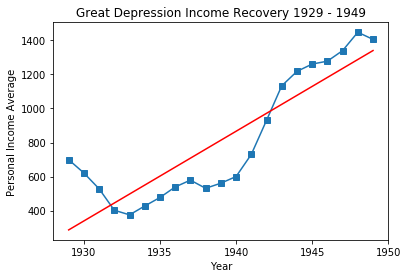

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(us_great_data_df["TimePeriod"], us_great_data_df["DataValue"],marker = "s")
x_values = us_great_data_df["TimePeriod"]
y_values = us_great_data_df["DataValue"]

plt.xticks([1930,1935,1940,1945,1950])
plt.title("Great Depression Income Recovery 1929 - 1949")
plt.xlabel("Year")
plt.ylabel("Personal Income Average")

# #Regression Line

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)


plt.show()
#AddMarkersAt1929&2008
plt.savefig("../project1/Great Depression Income Recovery.png")

# Income recovery during the great depression took ten to eleven years to  get back to the privous levels. 

In [30]:
#100 year income recovery data pull
url_all_inc=f"https://apps.bea.gov/api/data/?&UserID={api_key}&method=GetData&datasetname=Regional&TableName=SAINC1&GeoFIPS=00000&LineCode=3&Year=ALLYEARS&ResultFormat=JSON"
response_all_inc = requests.get(url_all_inc).json()
#response_pcomp

us_all_df = pd.DataFrame(response_all_inc["BEAAPI"]["Results"]["Data"])
#us_all_df.count

In [31]:
#All Years Income Recovery Data cleaning process

#columns = ["Year","Consumption Expenditures"]
us_all_data_df= us_all_df[["TimePeriod","DataValue"]]

#Set the index to be "TimePeriod" so they will be used as labels
us_all_data_df = us_all_data_df.set_index("TimePeriod")
us_all_data_df = us_all_data_df.reset_index()

us_all_data_df["DataValue"]=us_all_data_df["DataValue"].str.replace(",","")
us_all_data_df["DataValue"]=pd.to_numeric(us_all_data_df["DataValue"])
us_all_data_df["TimePeriod"]=pd.to_numeric(us_all_data_df["TimePeriod"])
#time_and_data_df.columns = columns
#us_all_data_df

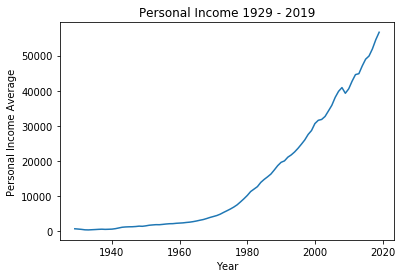

<Figure size 432x288 with 0 Axes>

In [32]:
#All Years Income Recovery plot
plt.clf()
plt.plot(us_all_data_df["TimePeriod"], us_all_data_df["DataValue"])
#plt.xticks(rotation= 90)
plt.title("Personal Income 1929 - 2019")
plt.xlabel("Year")
plt.ylabel("Personal Income Average")

# # #Regression Line
# x_values = us_all_data_df["TimePeriod"]
# y_values = us_all_data_df["DataValue"]
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_values,regress_values,"r-")
# #plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#print(line_eq)


plt.show()
#us_all_data_df["DataValue"]
plt.savefig("../project1/Personal Income Summary.png")

# Looking at 90 years of personal income data, shows an upward trend after the economic recovered from the great depression and although there was another dip around the great recession period.